In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/otto-group-product-classification-challenge/sampleSubmission.csv
/kaggle/input/otto-group-product-classification-challenge/train.csv
/kaggle/input/otto-group-product-classification-challenge/test.csv


- First let's load in the dataframe.

In [2]:
data_df = pd.read_csv('/kaggle/input/otto-group-product-classification-challenge/train.csv')
data_df.head(5)

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


We can see there are 5 rows and 95 columns. Of those columns 93 are predictors, 1 is the label, and there is also one column for the indices. We will now inspect the different datatypes of each of these features. 

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Data columns (total 95 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       61878 non-null  int64 
 1   feat_1   61878 non-null  int64 
 2   feat_2   61878 non-null  int64 
 3   feat_3   61878 non-null  int64 
 4   feat_4   61878 non-null  int64 
 5   feat_5   61878 non-null  int64 
 6   feat_6   61878 non-null  int64 
 7   feat_7   61878 non-null  int64 
 8   feat_8   61878 non-null  int64 
 9   feat_9   61878 non-null  int64 
 10  feat_10  61878 non-null  int64 
 11  feat_11  61878 non-null  int64 
 12  feat_12  61878 non-null  int64 
 13  feat_13  61878 non-null  int64 
 14  feat_14  61878 non-null  int64 
 15  feat_15  61878 non-null  int64 
 16  feat_16  61878 non-null  int64 
 17  feat_17  61878 non-null  int64 
 18  feat_18  61878 non-null  int64 
 19  feat_19  61878 non-null  int64 
 20  feat_20  61878 non-null  int64 
 21  feat_21  61878 non-null  int64 
 22

Apart from the target column, the columns are all of type int64. Now let's see if there are any missing values in our dataset to potentially impute or remove from our dataset.

<AxesSubplot:>

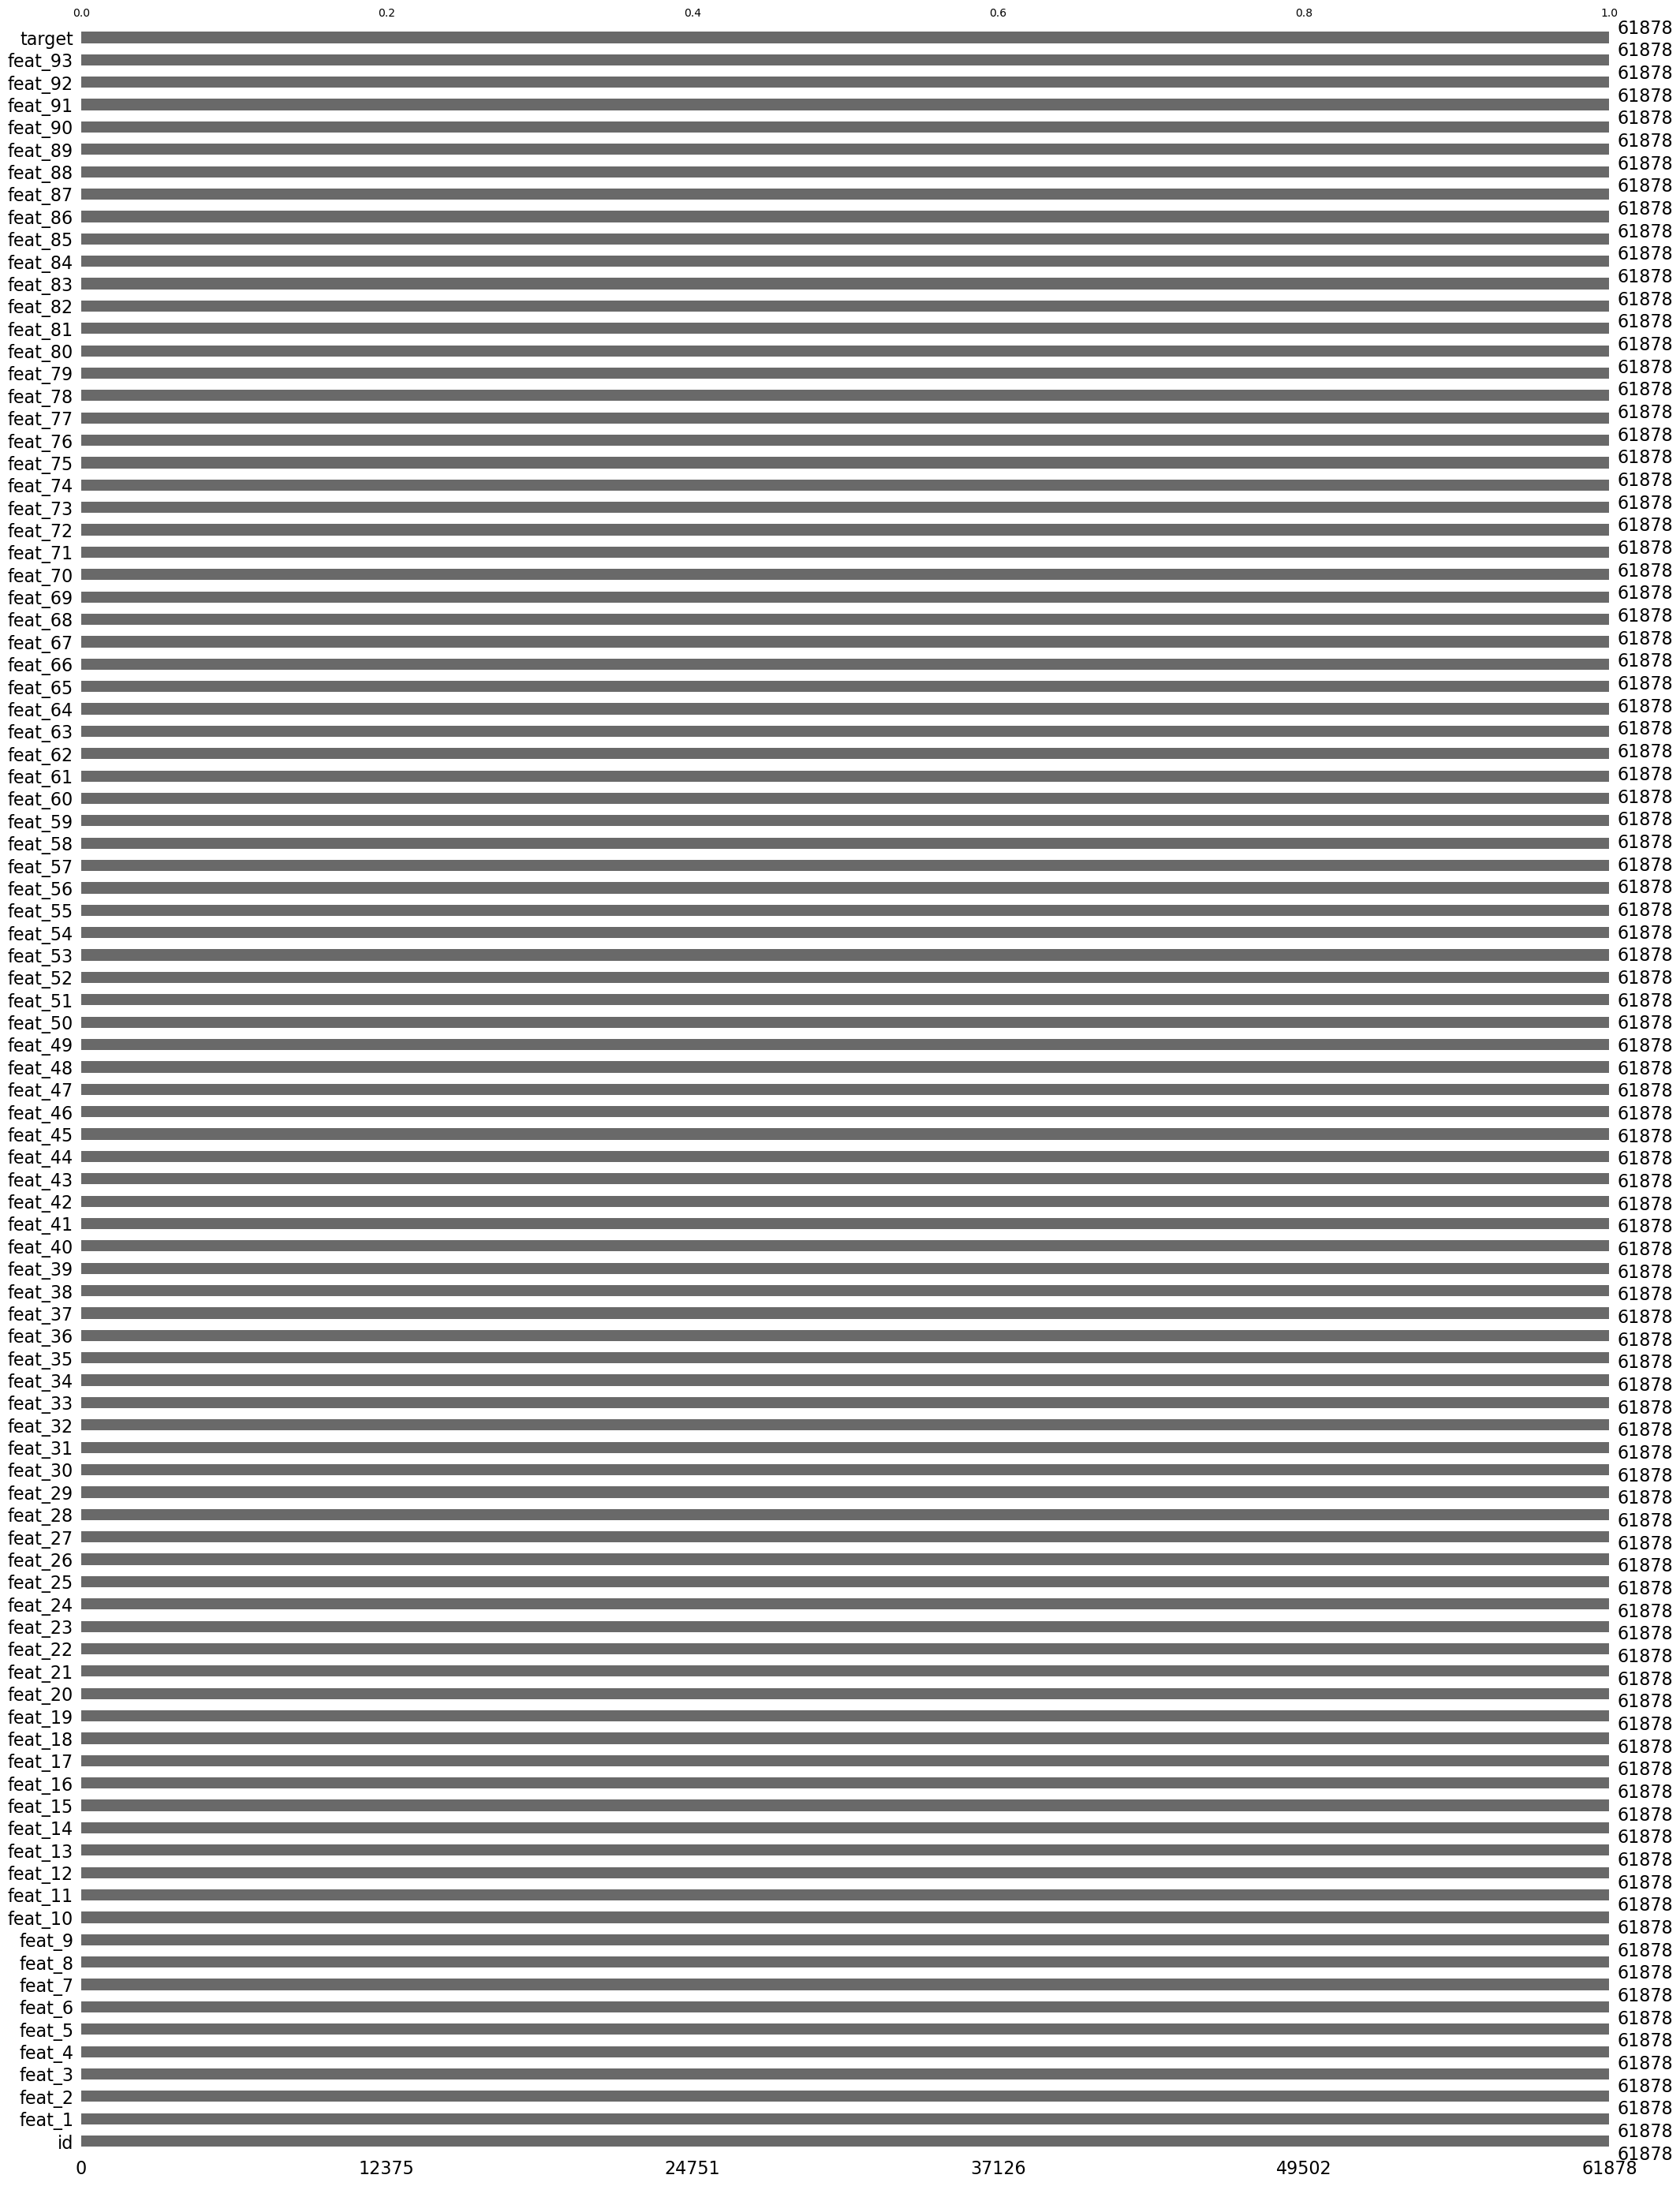

In [4]:
import missingno as msno

msno.bar(data_df)

There are no missing values inside of this dataset, which means there is no need to remove or impute values. I will now move onto preprocessing the features and labels to fit our model. First, I will divide the features and the  label, as well as drop any columns not needed for prediction purposes.

In [5]:
features = data_df.drop(['target', 'id'], axis=1)
labels = data_df['target'] 
features.shape

(61878, 93)

Let's check the values stored inside of labels.

In [6]:
labels.value_counts()

Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: target, dtype: int64

In [7]:
labels

0        Class_1
1        Class_1
2        Class_1
3        Class_1
4        Class_1
          ...   
61873    Class_9
61874    Class_9
61875    Class_9
61876    Class_9
61877    Class_9
Name: target, Length: 61878, dtype: object

One of the models we are going to use to classify the different classes of products is XGBoost. XGboost requires integers for the labels, so we're going to have to encode the target column. To perform this I will use sklearn's LabelEncoder to transform each target class string to an integer output.

In [8]:
from sklearn.preprocessing import LabelEncoder
from pandas import DataFrame

le = LabelEncoder()

labels = le.fit_transform(labels)
DataFrame(labels).value_counts()

1    16122
5    14135
7     8464
2     8004
8     4955
6     2839
4     2739
3     2691
0     1929
dtype: int64

Now that the labels are encoded the next thing we are going to look at is our features. We have already checked if there are no missing values contained in the dataset. Let's look at the features and see what the values look like.

In [9]:
features.value_counts()

feat_1  feat_2  feat_3  feat_4  feat_5  feat_6  feat_7  feat_8  feat_9  feat_10  feat_11  feat_12  feat_13  feat_14  feat_15  feat_16  feat_17  feat_18  feat_19  feat_20  feat_21  feat_22  feat_23  feat_24  feat_25  feat_26  feat_27  feat_28  feat_29  feat_30  feat_31  feat_32  feat_33  feat_34  feat_35  feat_36  feat_37  feat_38  feat_39  feat_40  feat_41  feat_42  feat_43  feat_44  feat_45  feat_46  feat_47  feat_48  feat_49  feat_50  feat_51  feat_52  feat_53  feat_54  feat_55  feat_56  feat_57  feat_58  feat_59  feat_60  feat_61  feat_62  feat_63  feat_64  feat_65  feat_66  feat_67  feat_68  feat_69  feat_70  feat_71  feat_72  feat_73  feat_74  feat_75  feat_76  feat_77  feat_78  feat_79  feat_80  feat_81  feat_82  feat_83  feat_84  feat_85  feat_86  feat_87  feat_88  feat_89  feat_90  feat_91  feat_92  feat_93
0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0 

Since there is a high variability in the feature's data we are going to normalize the data to make sure an extreme values in certain features do not increase the bias of our predictions.

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

features = scaler.fit_transform(features)

next we will split the data into training and testing, and also we will create a map to store the scores of the various models we will experiment with in this challenge.

In [11]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(features, labels, train_size=0.8)
scores = {}

- Now we will build a basic XGBoost Classifier, train the model, and evaluate its accuracy on the test portion of the dataset.

In [12]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgboost = XGBClassifier()

xgboost.fit(train_X, train_y)

predictions = xgboost.predict(test_X)

scores['Base XGBoost Classifier'] = accuracy_score(test_y, predictions)

scores['Base XGBoost Classifier']


0.8143180349062702

The base XGBoost classifier was able to achieve an accuracy score of 99.9%. I did not expect to achieve such a high score on the first attempt, but I will still continue to try other models and see how well they perform. 

Next, I will try to match or improve the score of the XGBoost model using RandomizerSearchCV to find the optimal hyperparameters for the model. I will also use the stratified K folds to train our data with balanced targets in the cross validation sets.

We will use a parameter grid containing:
- n_estimators ranging from 100-250
- max_depth ranging from 4-12
-  min_split_loss ranging from 0 - 10
- subsample size from .75 - 1

By optimizing the max depth, gamma (min_split_loss), and subsample size in our randomized search grid we attempt to improve the performance by reducing the amount of overfitting experienced during the training process. On the other hand, the ensemble of estimators will work together to develop complex relationships between our features to classify our labels. The different estimator sizes will build models of varying complexity and assess them using cross-validation. In the end a combination of these improvements should help create a more optimal solution.

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'n_estimators': [100, 150, 200, 250],
             'max_depth': [4,6,8,10,12],
              'min_split_loss': [0, 1, 10],
              'subsample':[1, .9, .8, .75],
              'tree_method': ['exact', 'gpu_hist']
             }
param_comb = 5
folds = 10

skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=1001)
model = XGBClassifier(predictor='gpu_predictor')

random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=param_comb, n_jobs=-1, cv=skf.split(train_X, train_y), verbose=3)

grid_result = random_search.fit(train_X, train_y)
best_estimator = random_search.best_estimator_

predictions = best_estimator.predict(test_X)

score = accuracy_score(test_y, predictions)

scores['XGBoost Classifier with RandomizedSearchCV'] = score

scores['XGBoost Classifier with RandomizedSearchCV']

Fitting 10 folds for each of 5 candidates, totalling 50 fits


0.8203781512605042

Our model achieved an accuracy score of  This score is the same as the default XGBoost model's score. Let's compare the parameters of the models.

In [14]:
best_est_parameters = best_estimator.get_params()
xgb_parameters = xgboost.get_params()
score_differences = {}

for param in best_est_parameters:
    if param in xgb_parameters and xgb_parameters[param] != best_est_parameters[param]:
        score_differences[param] = [best_est_parameters[param], xgb_parameters[param]]
print('RandomizedSearchCV Estimator')
for param in score_differences:
    print("{}: {}".format(param, score_differences[param][0]))

print()
print('XGboost Default Estimator')
for param in score_differences:
    print("{}: {}".format(param, score_differences[param][1]))



RandomizedSearchCV Estimator
gamma: 1
gpu_id: 0
max_depth: 8
missing: nan
n_estimators: 150
predictor: gpu_predictor
subsample: 0.9

XGboost Default Estimator
gamma: 0
gpu_id: -1
max_depth: 6
missing: nan
n_estimators: 100
predictor: auto
subsample: 1


There are a few differences in the XGBoost model and the RandomizedSearchCV model.

- The RandomizedSearchCV model uses 200 estimators while the Xgboost uses 100 estimators. 
- The Xgboost model uses 100% of the subsample which is higher compared to RandomSearchCV's .9
- the RandomizedSearchCV uses a gamma of 10 while the XGBoost estimator uses a gamma value of 0

Next we will compare the results of the XGBoost classifier with the BaggingClassifier. Here we are going to tune the hyperparameters of the BaggingClassifier using GridSearchCV. Once we get the best estimator we will use the result and use it on the testing data.


In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[50, 100, 150, 200],
    'max_samples': [1, .9, .6],
    'max_features': [1, .9, .6],
}

clf = GridSearchCV(BaggingClassifier(), param_grid)
clf.fit(train_X, train_y)

bagging_estimator = clf.best_estimator_

predictions = bagging_estimator.predict(test_X)

score = accuracy_score(test_y, predictions)

scores['Bagging Classifier'] = score

scores['Bagging Classifier']

[CV 2/10] END max_depth=8, min_split_loss=10, n_estimators=100, subsample=0.9, tree_method=gpu_hist;, score=0.786 total time=   7.8s
[CV 3/10] END max_depth=8, min_split_loss=10, n_estimators=100, subsample=0.9, tree_method=gpu_hist;, score=0.780 total time=   4.0s
[CV 5/10] END max_depth=8, min_split_loss=10, n_estimators=100, subsample=0.9, tree_method=gpu_hist;, score=0.783 total time=   4.1s
[CV 7/10] END max_depth=8, min_split_loss=10, n_estimators=100, subsample=0.9, tree_method=gpu_hist;, score=0.786 total time=   4.1s
[CV 9/10] END max_depth=8, min_split_loss=10, n_estimators=100, subsample=0.9, tree_method=gpu_hist;, score=0.789 total time=   3.6s
[CV 1/10] END max_depth=8, min_split_loss=1, n_estimators=150, subsample=0.9, tree_method=exact;, score=0.818 total time= 8.5min
[CV 4/10] END max_depth=8, min_split_loss=1, n_estimators=150, subsample=0.9, tree_method=exact;, score=0.808 total time= 8.4min
[CV 6/10] END max_depth=8, min_split_loss=1, n_estimators=150, subsample=0.9,

0.8131868131868132

The final model we will use for this is a RandomForestClassifier. 

In [16]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(train_X, train_y)

predictions = clf.predict(test_X)

score = accuracy_score(test_y, predictions)

scores['RandomForestClassifier'] = score

scores['RandomForestClassifier']

0.8118939883645766

Here are the final scores

In [17]:
for score in scores:
    print('{}: {}'.format(score, scores[score]))

Base XGBoost Classifier: 0.8143180349062702
XGBoost Classifier with RandomizedSearchCV: 0.8203781512605042
Bagging Classifier: 0.8131868131868132
RandomForestClassifier: 0.8118939883645766


In [18]:
import pandas as pd

test_data = pd.read_csv("/kaggle/input/otto-group-product-classification-challenge/test.csv")
test_data

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,...,0,0,0,0,0,0,0,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144363,144364,0,0,0,0,0,0,0,0,0,...,0,0,2,1,1,0,0,0,0,0
144364,144365,0,0,0,0,0,0,0,0,0,...,0,1,4,1,11,0,0,0,0,0
144365,144366,0,1,0,0,0,0,1,1,0,...,0,1,3,1,1,0,0,1,0,0
144366,144367,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,0,1,0


In [19]:
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier


scaler = MinMaxScaler()
test_data_scaled = scaler.fit_transform(test_data.drop('id', axis=1))
pred = best_estimator.predict_proba(test_data_scaled)
pred
submission = pd.DataFrame(pred, columns=le.classes_)
submission.to_csv('submission.csv', index=False)